# **Code Demo: Load & Visualize Time Series Data**

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


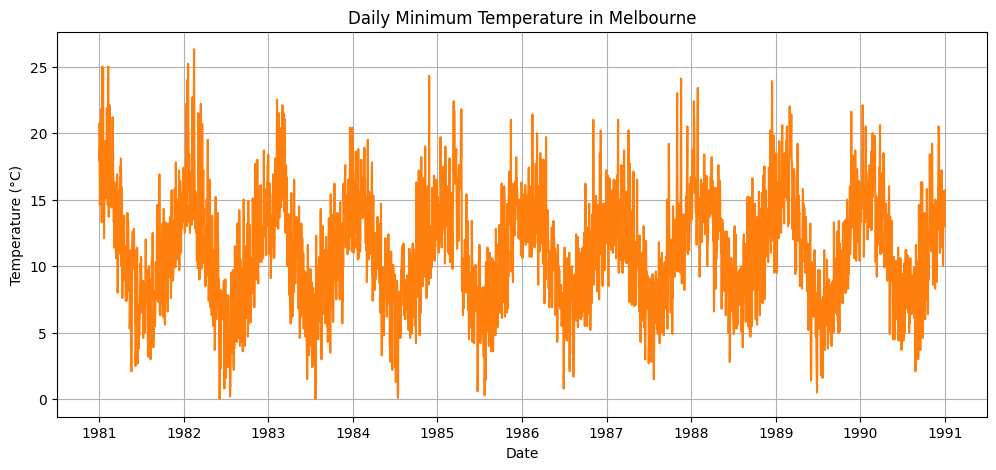

In [10]:
# Step 1: Import necessary libraries
import pandas as pd                      # For data manipulation
import matplotlib.pyplot as plt          # For plotting

# Step 2: Load a sample time series dataset (daily minimum temperatures in Melbourne)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)                    # Load dataset from online source

# Step 3: Check the first few rows
print(df.head())                         # Shows Date and Temperature columns

# Step 4: Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: Set the datetime column as the index
df.set_index('Date', inplace=True)

# Step 6: Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(df['Temp'], color='tab:orange')   # Line plot of temperature over time
plt.title("Daily Minimum Temperature in Melbourne")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


# **Visualizing Trend, Seasonality, and Noise**

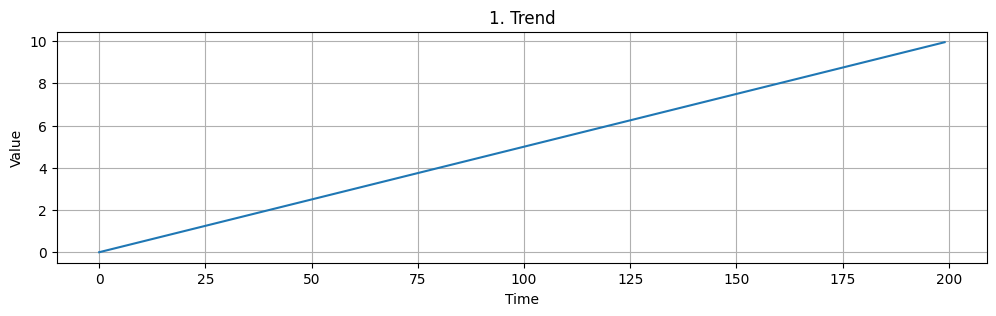

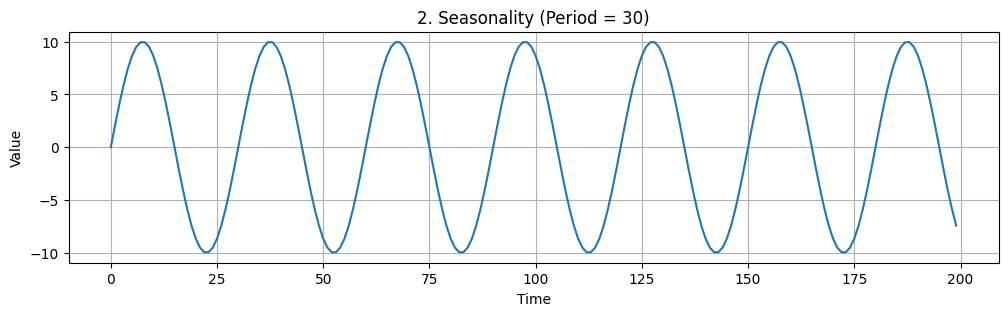

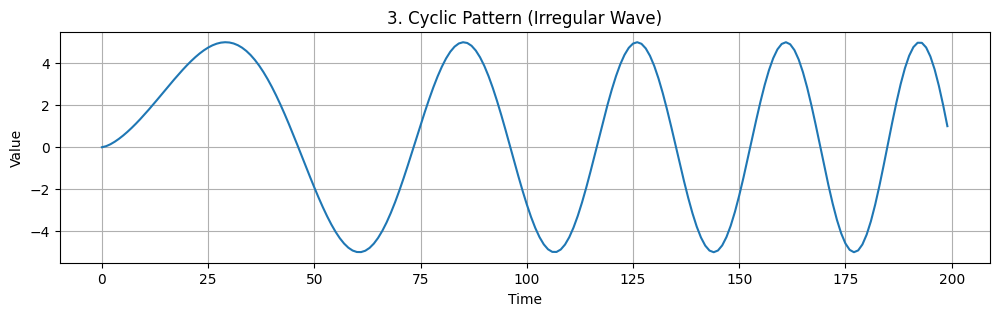

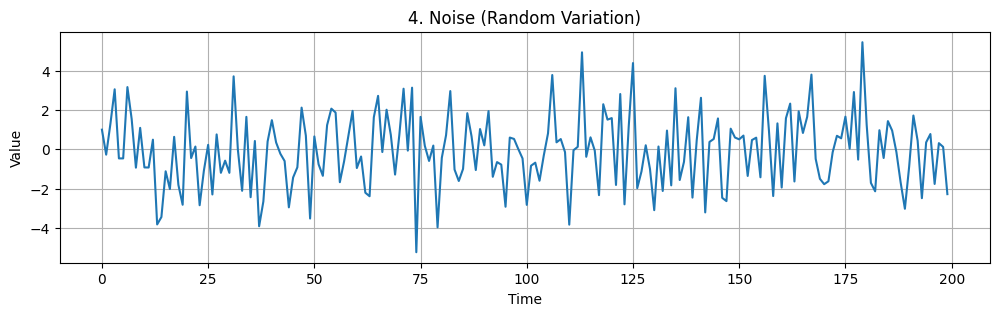

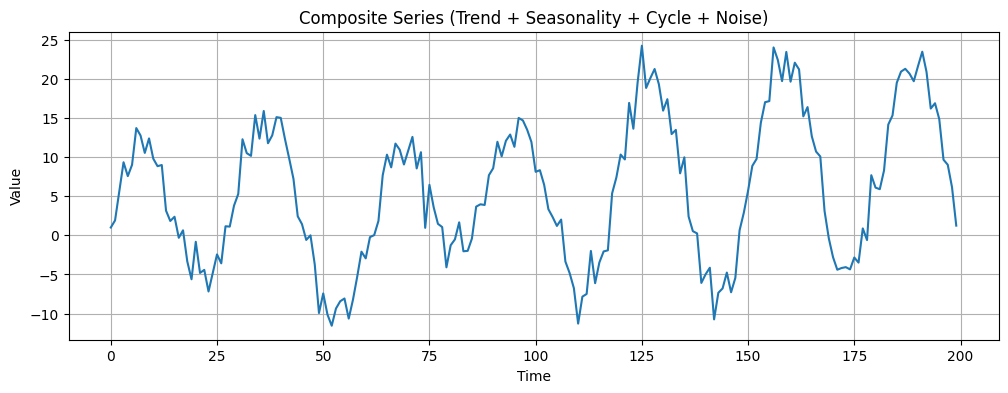

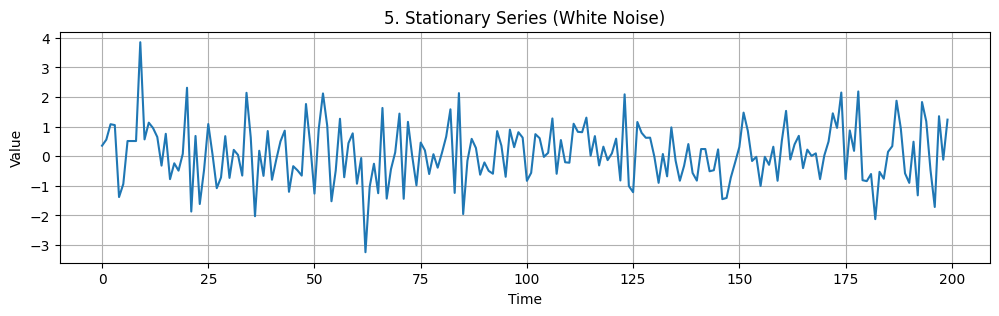

ADF Statistic: -14.719231601116302
p-value: 2.76870465070279e-27
Stationary? Yes


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Set seed for reproducibility
np.random.seed(42)
t = np.arange(0, 200)

# 1. Trend Component
trend = 0.05 * t
plt.figure(figsize=(12, 3))
plt.plot(t, trend)
plt.title("1. Trend")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 2. Seasonality Component
seasonality = 10 * np.sin(2 * np.pi * t / 30)
plt.figure(figsize=(12, 3))
plt.plot(t, seasonality)
plt.title("2. Seasonality (Period = 30)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 3. Cyclic Pattern (less regular than seasonality)
cycle = 5 * np.sin(0.01 * t ** 1.5)
plt.figure(figsize=(12, 3))
plt.plot(t, cycle)
plt.title("3. Cyclic Pattern (Irregular Wave)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 4. Noise Component
noise = np.random.normal(0, 2, len(t))
plt.figure(figsize=(12, 3))
plt.plot(t, noise)
plt.title("4. Noise (Random Variation)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Combine all components into a composite time series
composite = trend + seasonality + cycle + noise
plt.figure(figsize=(12, 4))
plt.plot(t, composite)
plt.title("Composite Series (Trend + Seasonality + Cycle + Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 5. Stationarity: Create a stationary series (white noise)
stationary = np.random.normal(0, 1, len(t))
plt.figure(figsize=(12, 3))
plt.plot(t, stationary)
plt.title("5. Stationary Series (White Noise)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Check Stationarity using ADF Test
result = adfuller(stationary)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Stationary?" , "Yes" if result[1] < 0.05 else "No")


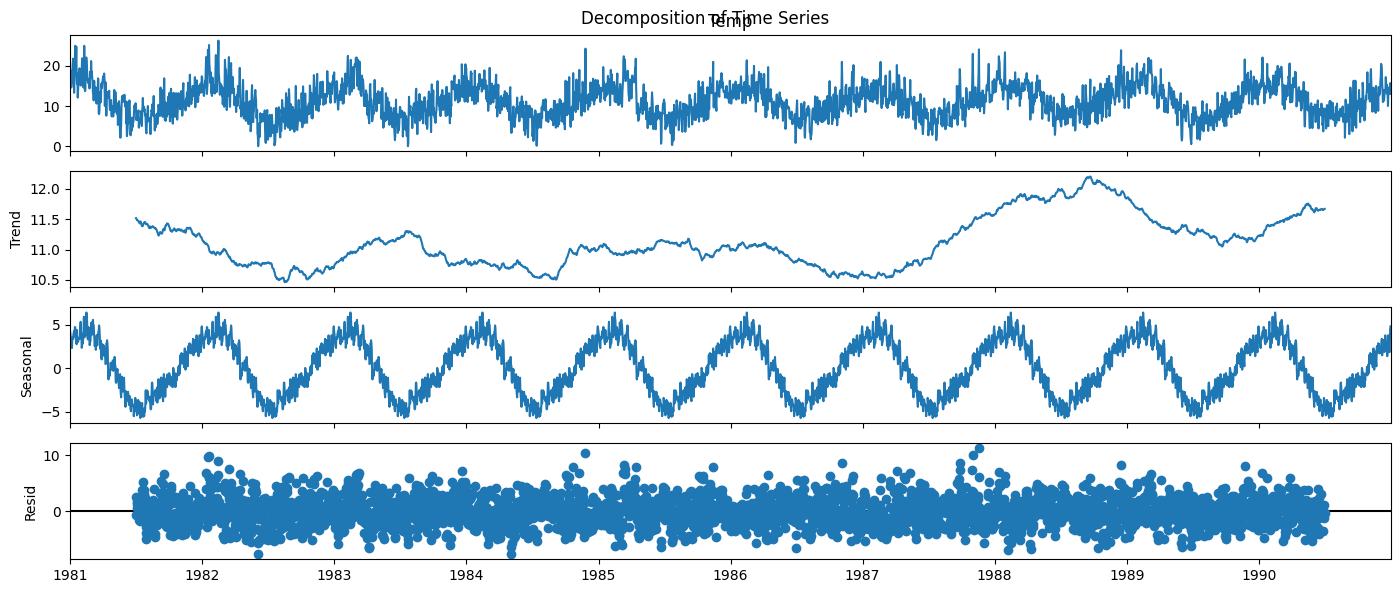

In [12]:
# Step 1: Import the seasonal_decompose tool
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Apply decomposition (additive model)
result = seasonal_decompose(df['Temp'], model='additive', period=365)  # 365 = daily data with yearly cycle

# Step 3: Plot each component
plt.rcParams.update({'figure.figsize': (14, 6)})
result.plot()
plt.suptitle("Decomposition of Time Series", fontsize=12)
plt.show()


Observed: The raw original time series

Trend: Smoothed version showing the general direction

Seasonal: Repeating yearly pattern (since we set period=365)

Residual: What's left after removing trend and seasonality (noise)

# **Forecast vs Actual – Concept Illustration**

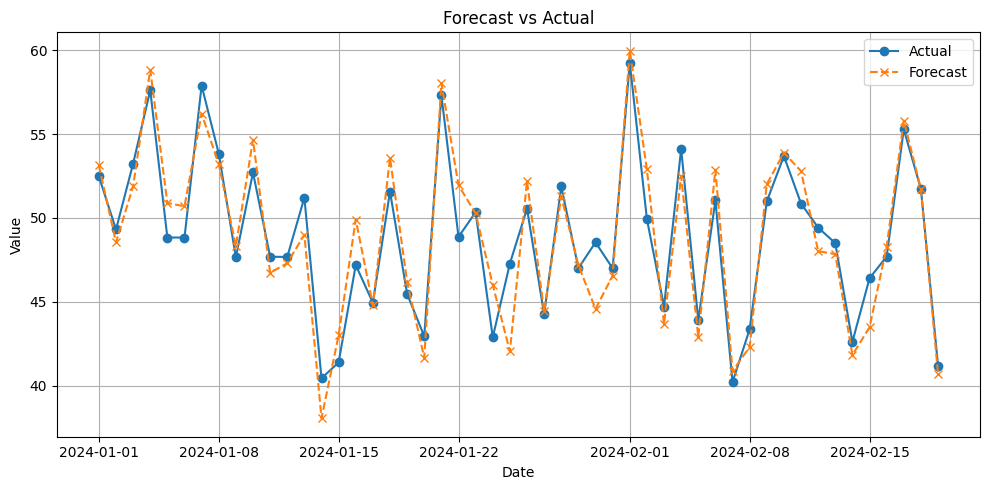

In [13]:
# Generate dummy time series data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a date range
dates = pd.date_range(start='2024-01-01', periods=50)

# Simulate actual and forecast values
np.random.seed(42)
actual = np.random.normal(loc=50, scale=5, size=50)
forecast = actual + np.random.normal(loc=0, scale=2, size=50)

# Create a DataFrame
df_forecast = pd.DataFrame({'Date': dates, 'Actual': actual, 'Forecast': forecast})
df_forecast.set_index('Date', inplace=True)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df_forecast['Actual'], label='Actual', marker='o')
plt.plot(df_forecast['Forecast'], label='Forecast', linestyle='--', marker='x')
plt.title("Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This basic chart shows the idea behind forecasting — we're trying to predict future values, and comparing them against what actually happens. The closer the lines, the better the model.

We aren’t using a prediction algorithm at all. It is a conceptual illustration, not a real forecasting model.

It simulated random values (np.random.normal) to create fake “actual” values Then it added small noise to those values to simulate “forecast” values.


# **Simulate a Mini Pipeline (Data Collection to EDA)**

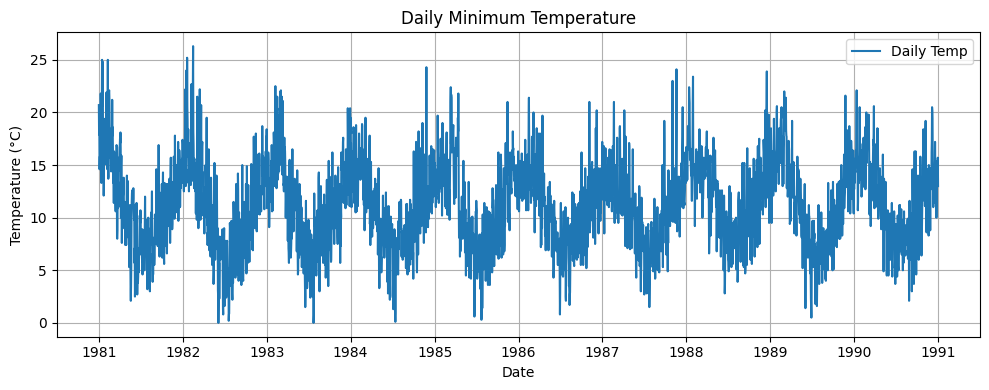

            Temp DayOfWeek
Date                      
1981-01-01  20.7  Thursday
1981-01-02  17.9    Friday
1981-01-03  18.8  Saturday
1981-01-04  14.6    Sunday
1981-01-05  15.8    Monday


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate data collection
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Step 2: Preprocessing – parse dates & set index
df['Date'] = pd.to_datetime(df['Date'])   # Parsing string to datetime
df.set_index('Date', inplace=True)    # Setting the datetime column as index

# Step 3: EDA – basic plot
plt.figure(figsize=(10, 4))
plt.plot(df['Temp'], label='Daily Temp')
plt.title("Daily Minimum Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Add feature (day of week)
df['DayOfWeek'] = df.index.day_name()
print(df[['Temp', 'DayOfWeek']].head())


This short example mimics a real pipeline: we load the data, parse timestamps, do some visual EDA, and even engineer a new feature — the day of the week, which might later help explain seasonality or patterns.

# **Time Series Preprocessing Examples**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset from an online source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Step 2: Convert the 'Date' column to datetime format
# This ensures that pandas can recognize and operate on date values
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Set 'Date' as the DataFrame index
# This turns the dataset into a time series, enabling resampling and filtering
df.set_index('Date', inplace=True)

# Step 4: Resample the daily data to monthly frequency
# 'ME' refers to "month end" – it groups all data by month and computes the mean temperature
monthly_df = df.resample('ME').mean()
print("Monthly average temperature (first 5 rows):\n", monthly_df.head())

# Step 5: Simulate missing data to demonstrate how filling works
# We manually introduce missing values in rows 10 to 14
df_missing = df.copy()
df_missing.iloc[10:15] = None  # Introduce 5 missing values

# Show how many missing values exist before filling
print("\nMissing values before fill:\n", df_missing.isnull().sum())

# Step 6: Fill the missing values using forward fill
# This replaces each missing value with the last known valid observation
df_filled = df_missing.ffill()

# Confirm that missing values are filled
print("\nMissing values after fill:\n", df_filled.isnull().sum())

# Step 7: Localize the datetime index to UTC time zone
# This is important when working with global systems or time zone-aware APIs
df_filled.index = df_filled.index.tz_localize('UTC')

# Display the first few timezone-aware timestamps to verify
print("\nTimezone-aware datetime index (first 3 rows):\n", df_filled.index[:3])


Monthly average temperature (first 5 rows):
                  Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323

Missing values before fill:
 Temp    5
dtype: int64

Missing values after fill:
 Temp    0
dtype: int64

Timezone-aware datetime index (first 3 rows):
 DatetimeIndex(['1981-01-01 00:00:00+00:00', '1981-01-02 00:00:00+00:00',
               '1981-01-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', freq=None)


.resample('M').mean() → Resamples to monthly mean values

.fillna(method='ffill') → Fills missing values with the last valid observation

.tz_localize() → Makes index timezone-aware (e.g., for aligning global logs)



# **Visualizing Missing Value Imputation Methods**

<ipython-input-16-72b4d2cbeb40>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df_missing.fillna(method='ffill')
<ipython-input-16-72b4d2cbeb40>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_missing.fillna(method='bfill')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

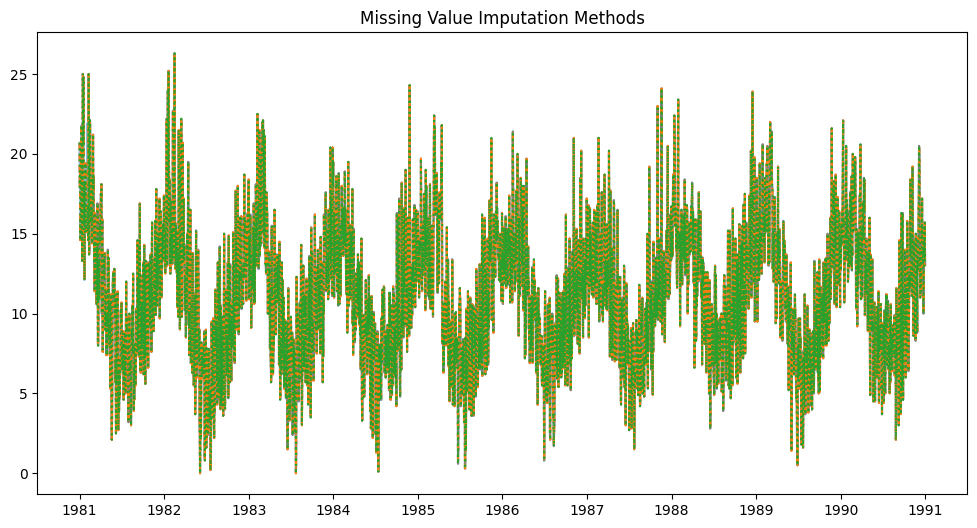

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Simulate missing values (for demonstration)
df_missing = df.copy()
df_missing.iloc[30:35] = np.nan  # Inject missing block

# Impute using different methods
df_ffill = df_missing.fillna(method='ffill')
df_bfill = df_missing.fillna(method='bfill')
df_interp = df_missing.interpolate(method='linear')
df_rolling = df_missing.fillna(df_missing.rolling(window=3, min_periods=1).mean())

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original', alpha=0.5)
plt.plot(df_missing, label='With Missing', color='gray', linestyle='--')
plt.plot(df_ffill, label='Forward Fill', linestyle='dashed')
plt.plot(df_interp, label='Linear Interpolation', linestyle='dotted')
plt.title("Missing Value Imputation Methods")
plt


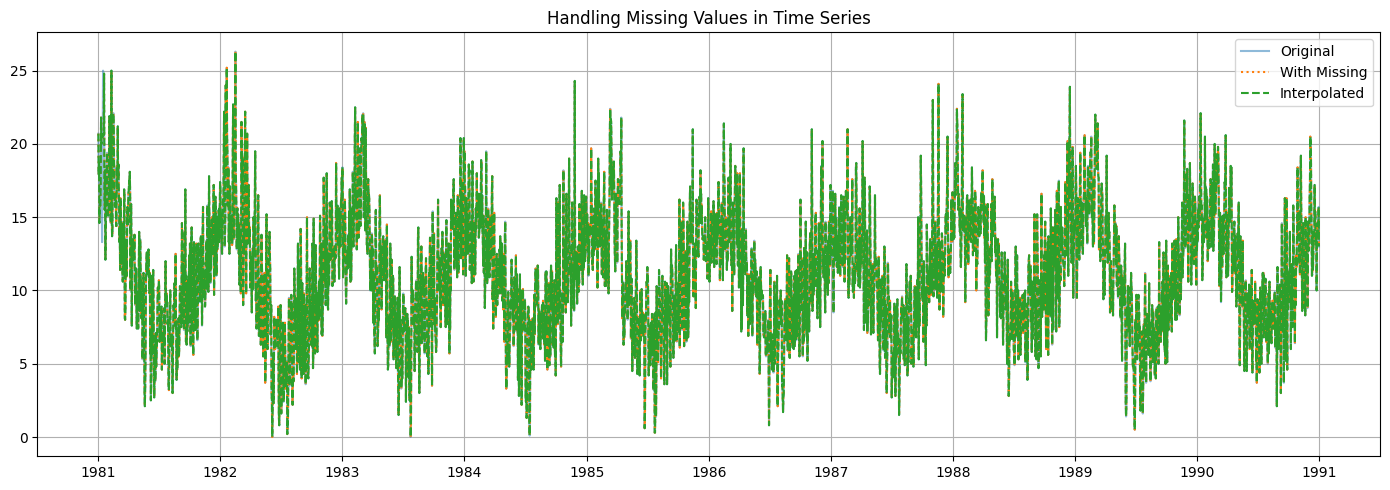

Missing before filling: Temp    6
dtype: int64
Missing after ffill: Temp    0
dtype: int64
Missing after bfill: Temp    0
dtype: int64
Missing after interpolation: Temp    0
dtype: int64
Missing after rolling mean fill: Temp    6
dtype: int64


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and prepare the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for time-based operations
df.set_index('Date', inplace=True)

# Step 2: Simulate missing data for demonstration
df_missing = df.copy()
df_missing.iloc[10:15] = np.nan  # Inject 5 missing values
df_missing.iloc[30] = np.nan     # Inject 1 isolated missing value

# Step 3: Forward Fill (ffill)
# Fills missing values using the last available non-missing value
df_ffill = df_missing.ffill()

# Step 4: Backward Fill (bfill)
# Fills missing values using the next available non-missing value
df_bfill = df_missing.bfill()

# Step 5: Linear Interpolation
# Estimates missing values based on the trend of neighboring values
df_interp = df_missing.interpolate(method='linear')

# Step 6: Rolling Mean Fill (7-day window, centered)
# Fills missing values using the average of 3 days before and after
df_roll_mean = df_missing.fillna(df_missing.rolling(window=7, center=True).mean())

# Step 7: Visual comparison (optional but helpful)
plt.figure(figsize=(14, 5))
plt.plot(df, label='Original', alpha=0.5)
plt.plot(df_missing, label='With Missing', linestyle='dotted')
plt.plot(df_interp, label='Interpolated', linestyle='--')
plt.title('Handling Missing Values in Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Print missing counts after each method
print("Missing before filling:", df_missing.isnull().sum())
print("Missing after ffill:", df_ffill.isnull().sum())
print("Missing after bfill:", df_bfill.isnull().sum())
print("Missing after interpolation:", df_interp.isnull().sum())
print("Missing after rolling mean fill:", df_roll_mean.isnull().sum())


You’ll clearly see the missing block in the middle.

Each method fills that gap differently, visually demonstrating their behavior.

# **Time Series Decomposition**

<Figure size 1200x800 with 0 Axes>

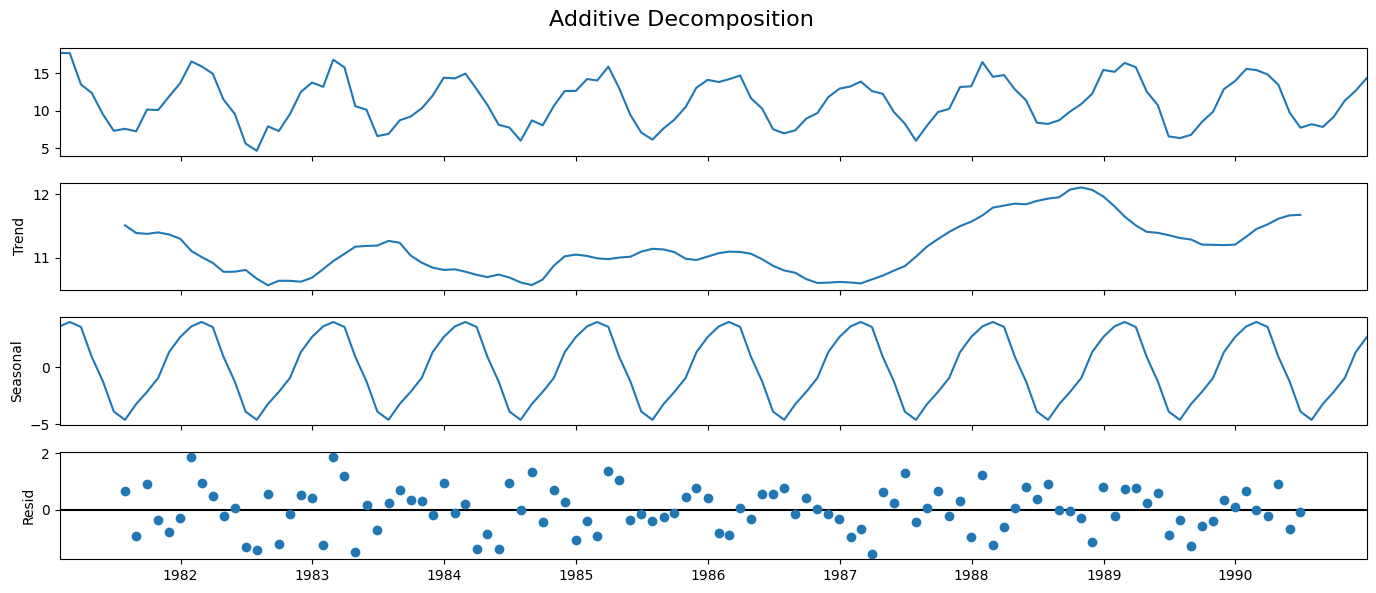

<Figure size 1200x800 with 0 Axes>

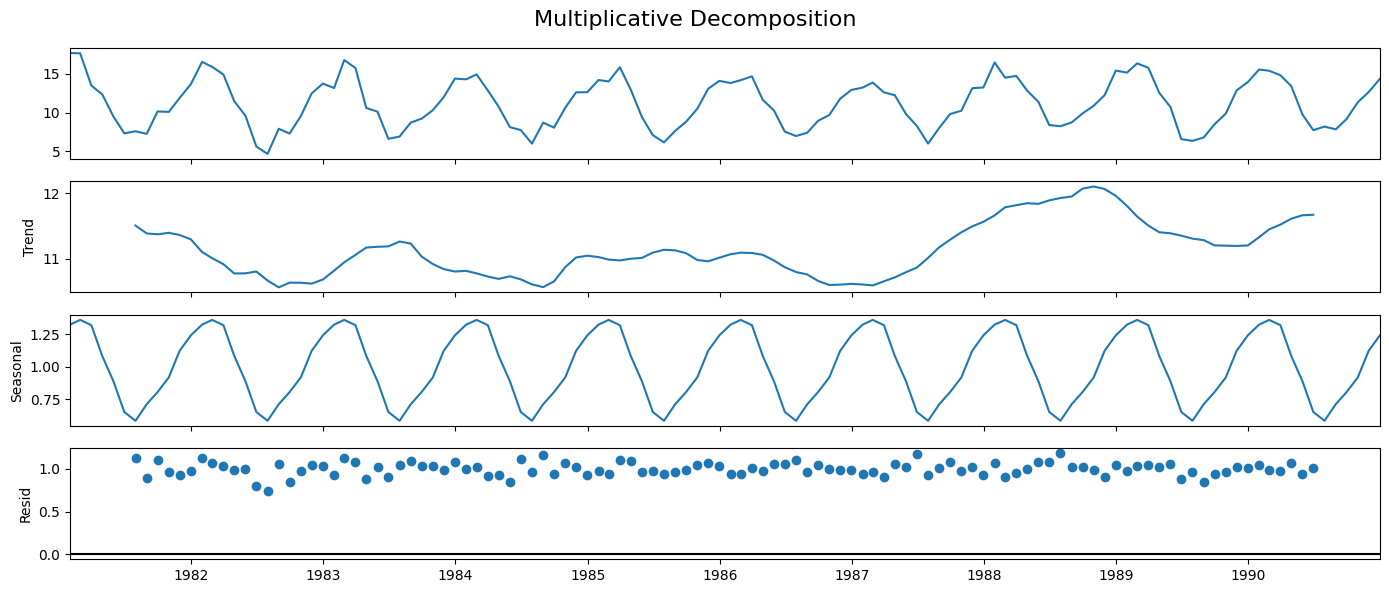

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load a daily temperature time series dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Step 2: Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Set the datetime as index to make it a proper time series
df.set_index('Date', inplace=True)

# Step 4: Optional - Resample to monthly average (to reduce noise and highlight trend/seasonality)
monthly_df = df.resample('ME').mean()  # 'ME' = month-end

# Step 5: Decompose the time series using Additive model
# This assumes: Observed = Trend + Seasonality + Residual
additive_result = seasonal_decompose(monthly_df, model='additive')

# Step 6: Plot the additive decomposition components
plt.figure(figsize=(12, 8))
additive_result.plot()
plt.suptitle("Additive Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

# Step 7: Decompose the time series using Multiplicative model
# This assumes: Observed = Trend * Seasonality * Residual
multiplicative_result = seasonal_decompose(monthly_df, model='multiplicative')

# Step 8: Plot the multiplicative decomposition components
plt.figure(figsize=(12, 8))
multiplicative_result.plot()
plt.suptitle("Multiplicative Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


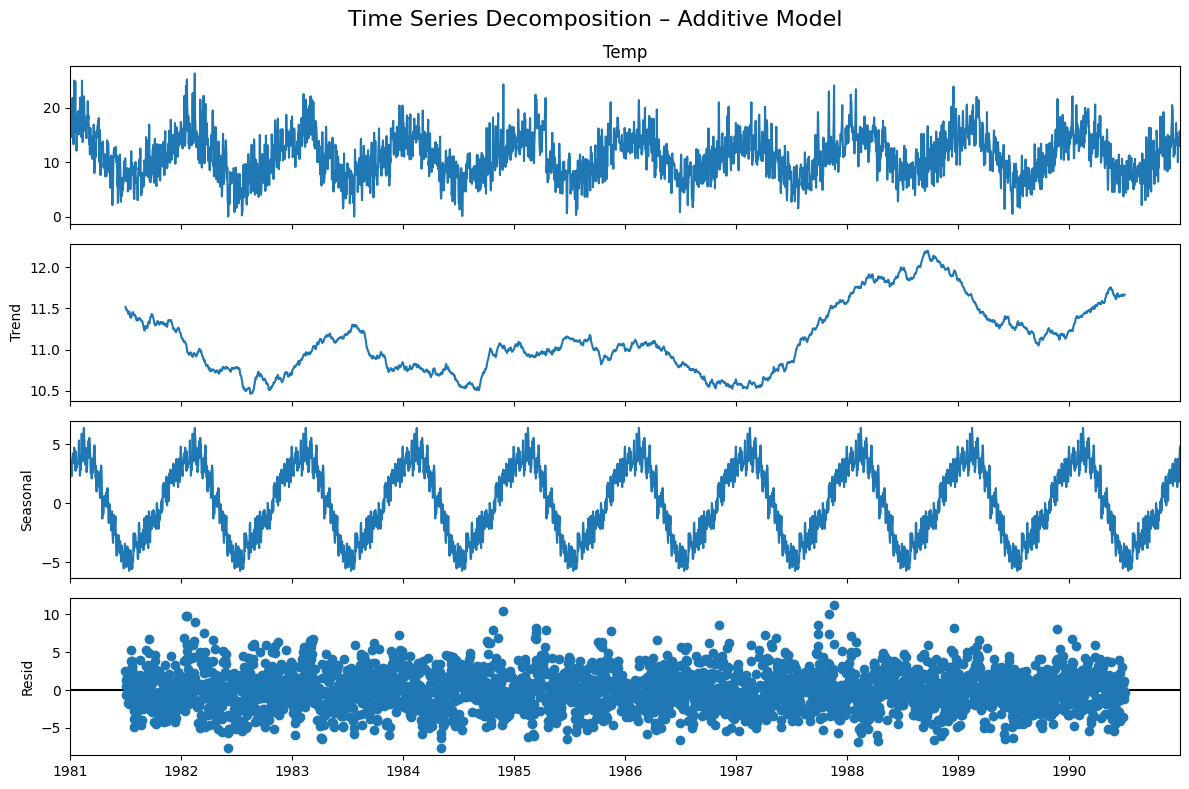

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load and prepare data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Perform decomposition (assume daily data with yearly seasonality)
result = seasonal_decompose(df['Temp'], model='additive', period=365)

# Plot all components
plt.rcParams.update({'figure.figsize': (12, 8)})
result.plot()
plt.suptitle("Time Series Decomposition – Additive Model", fontsize=16)
plt.tight_layout()
plt.show()


Observed: The original time series

Trend: Smooth long-term direction

Seasonal: Repeating yearly fluctuation

Residual: Irregular noise left over

This breakdown helps us model each component differently or even remove seasonality for more stable forecasting

# **EDA for Time Series**

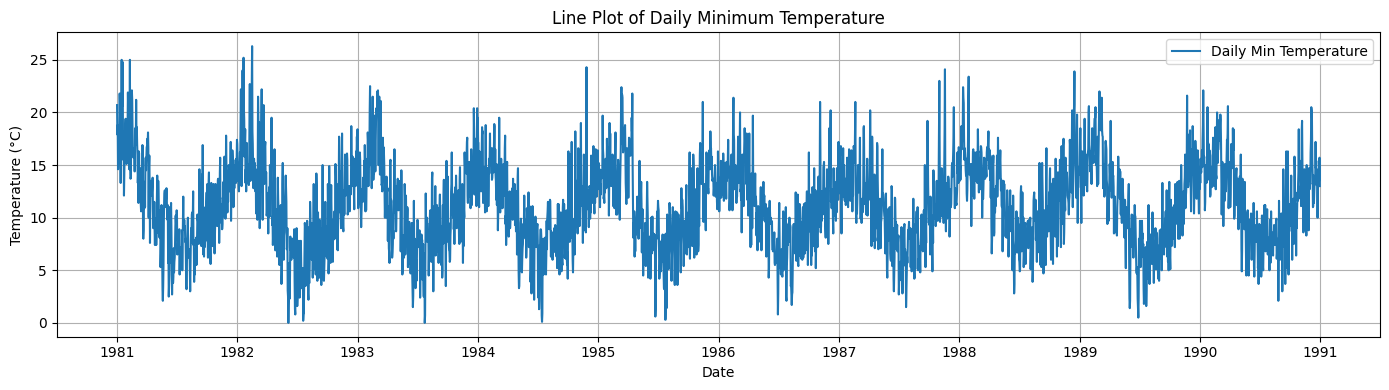

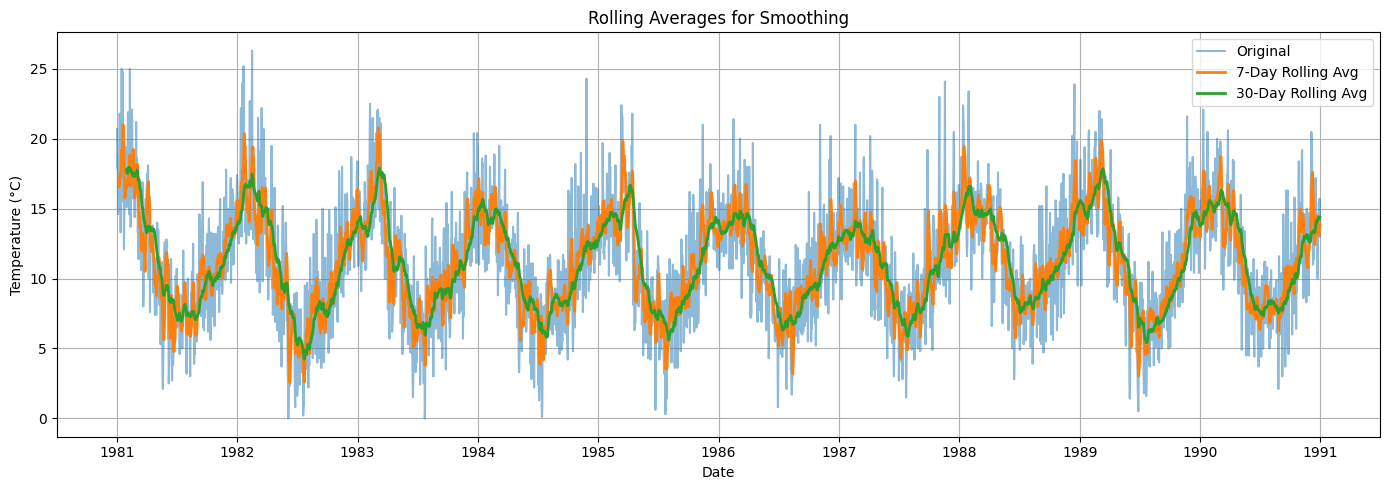

<ipython-input-20-568a7d91dc50>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')


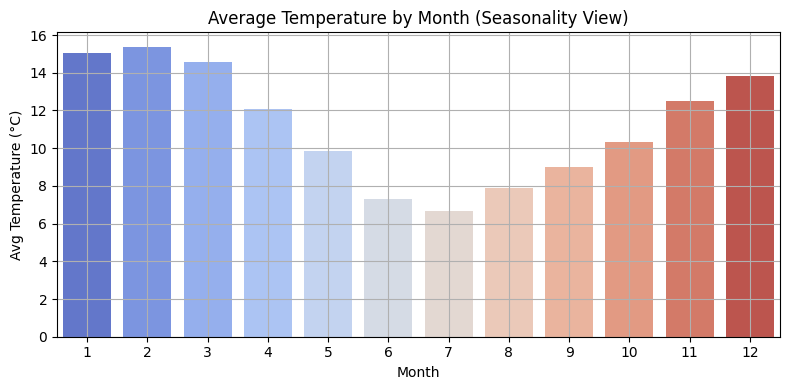

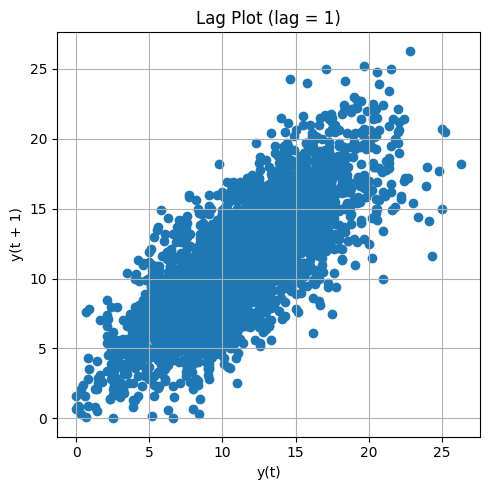

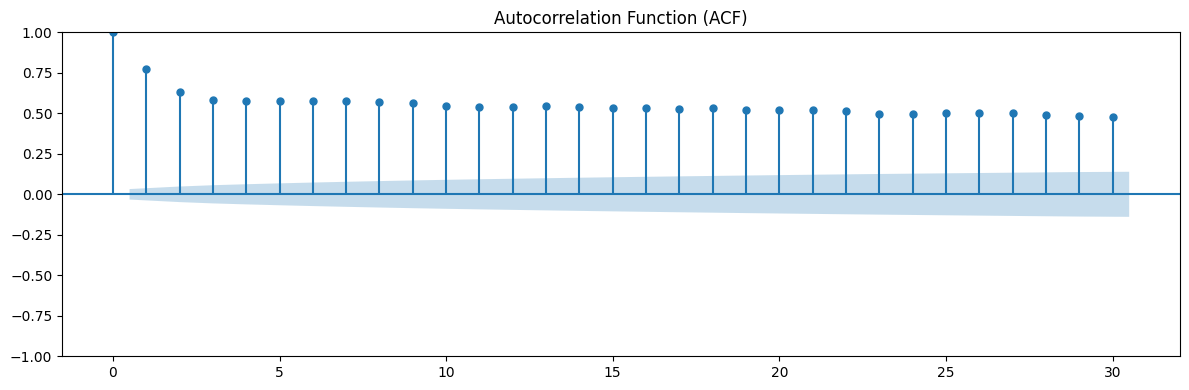

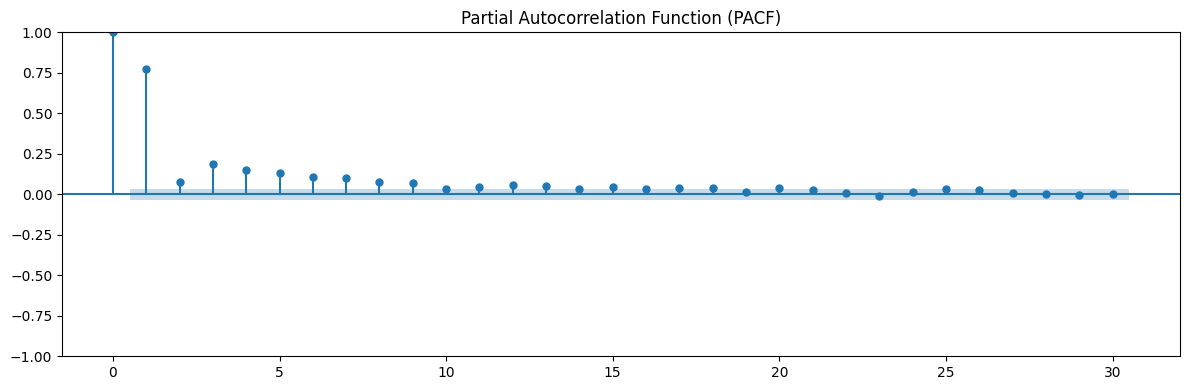

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load the time series dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Step 2: Convert the 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Line Plot – view the overall pattern of the time series
plt.figure(figsize=(14, 4))
plt.plot(df['Temp'], label='Daily Min Temperature')
plt.title("Line Plot of Daily Minimum Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Rolling Average (7-day and 30-day) to smooth short-term noise
df['Temp_7D'] = df['Temp'].rolling(window=7).mean()
df['Temp_30D'] = df['Temp'].rolling(window=30).mean()

plt.figure(figsize=(14, 5))
plt.plot(df['Temp'], label='Original', alpha=0.5)
plt.plot(df['Temp_7D'], label='7-Day Rolling Avg', linewidth=2)
plt.plot(df['Temp_30D'], label='30-Day Rolling Avg', linewidth=2)
plt.title("Rolling Averages for Smoothing")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Seasonal Plot – average temperature per month
# Extract month as a new column
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Temp'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title("Average Temperature by Month (Seasonality View)")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Lag Plot – check autocorrelation visually
plt.figure(figsize=(5, 5))
lag_plot(df['Temp'], lag=1)
plt.title("Lag Plot (lag = 1)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: ACF and PACF Plots
plt.figure(figsize=(12, 4))
plot_acf(df['Temp'], lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df['Temp'], lags=30, method='ywm', ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()


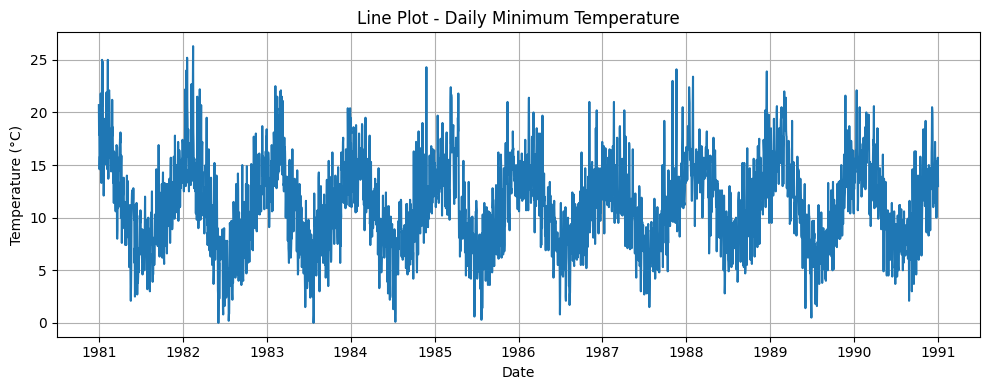

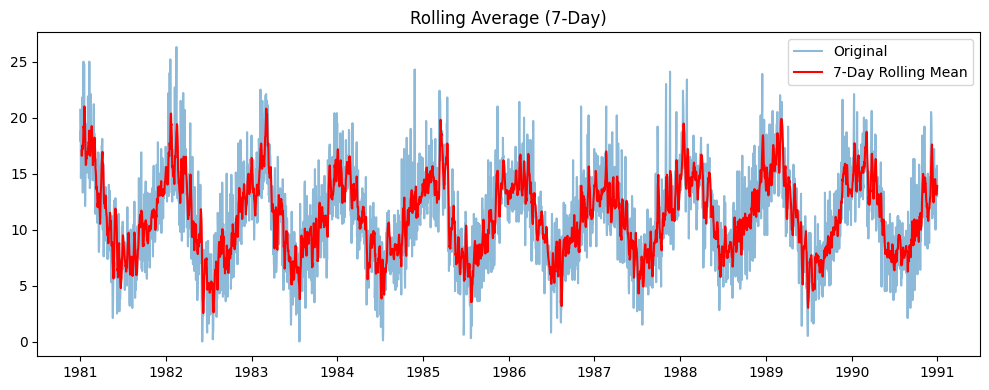

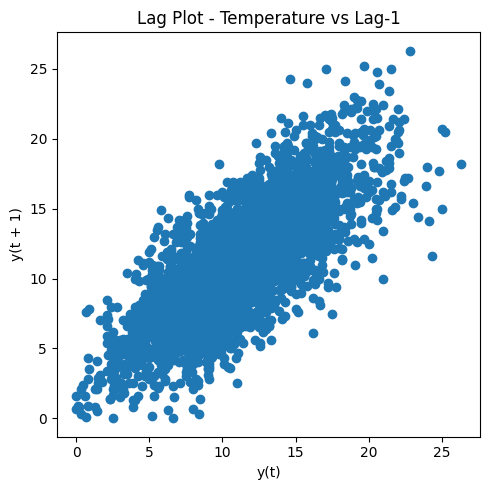

<Figure size 1000x400 with 0 Axes>

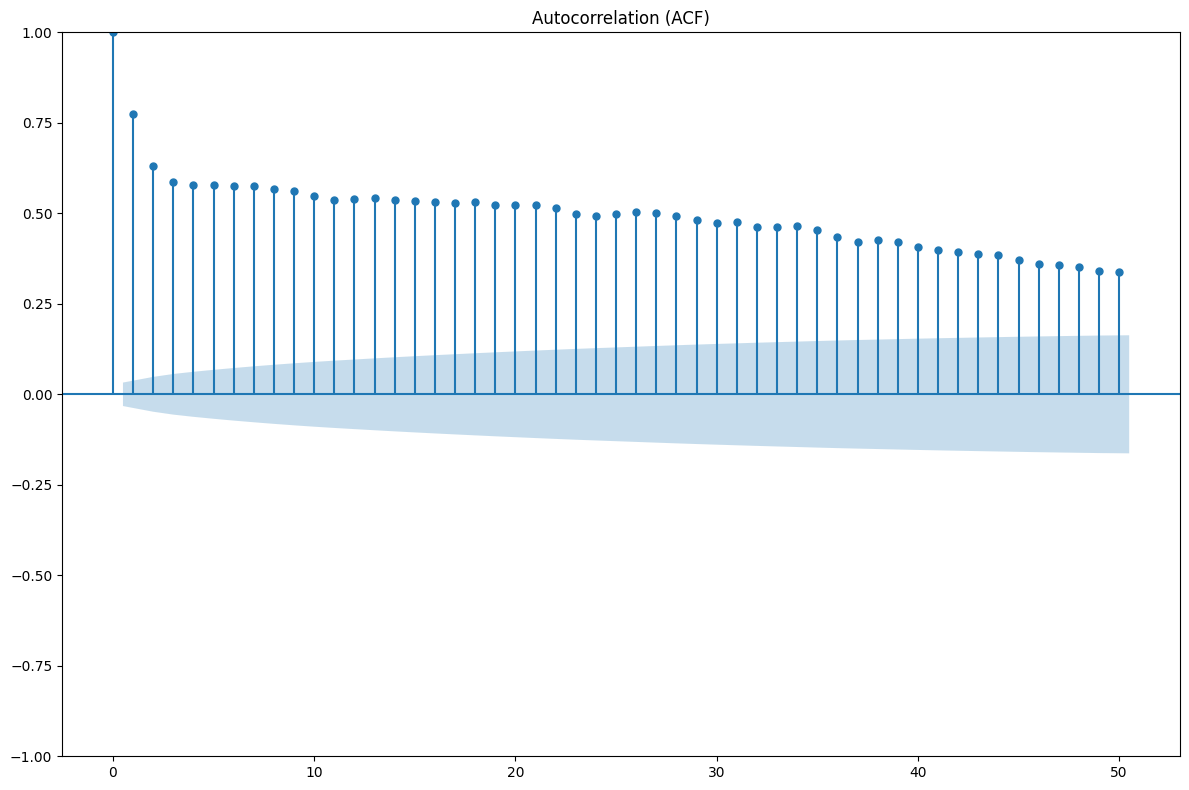

<Figure size 1000x400 with 0 Axes>

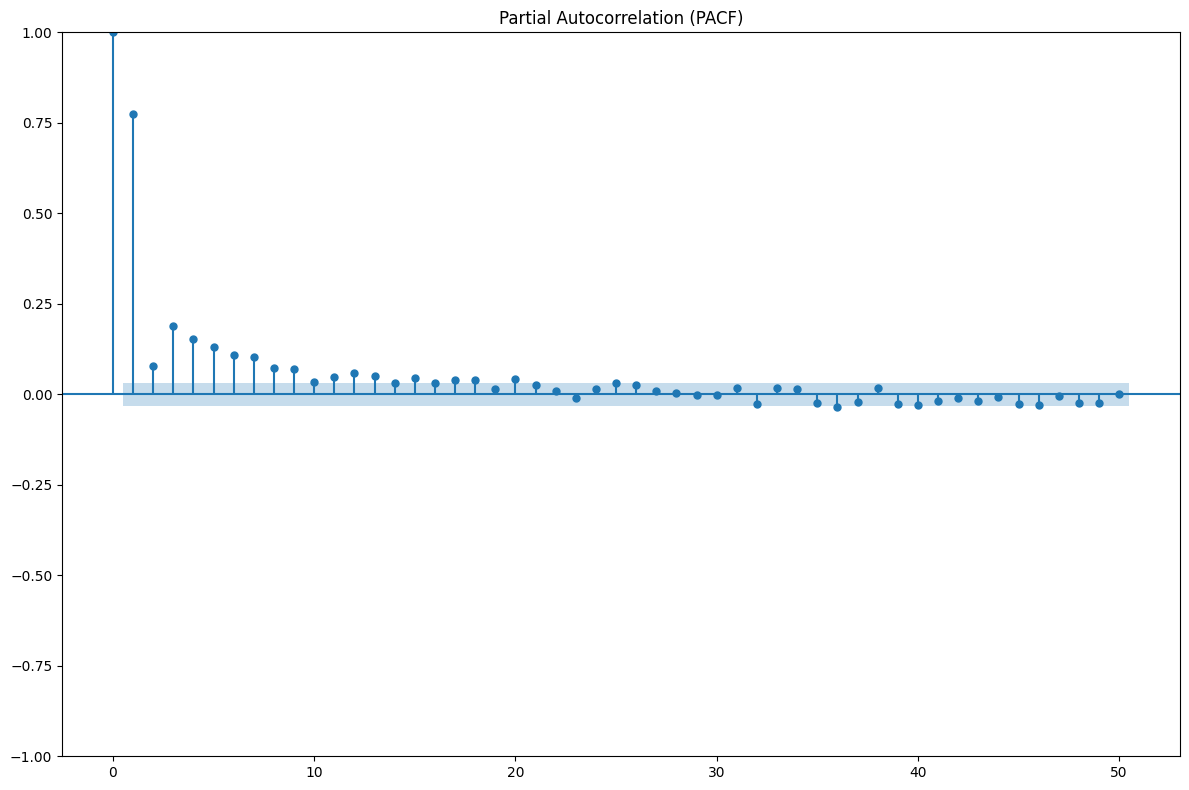

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load and prepare dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 1️ Line Plot
plt.figure(figsize=(10, 4))
plt.plot(df['Temp'], label='Daily Temp', color='tab:blue')
plt.title("Line Plot - Daily Minimum Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️ Rolling Mean (7-day window)
df['Rolling7'] = df['Temp'].rolling(window=7).mean()

plt.figure(figsize=(10, 4))
plt.plot(df['Temp'], label='Original', alpha=0.5)
plt.plot(df['Rolling7'], label='7-Day Rolling Mean', color='red')
plt.title("Rolling Average (7-Day)")
plt.legend()
plt.tight_layout()
plt.show()

# 3️ Lag Plot (visual correlation)
plt.figure(figsize=(5, 5))
lag_plot(df['Temp'])
plt.title("Lag Plot - Temperature vs Lag-1")
plt.tight_layout()
plt.show()

# 4️ Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(10, 4))
plot_acf(df['Temp'], lags=50)
plt.title("Autocorrelation (ACF)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(df['Temp'], lags=50)
plt.title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.show()


**Plot Type	-------> Purpose**

Line Plot -------> Baseline time series behavior

Rolling -------> Average	Trend smoothing

Lag Plot -------> Visual check for autocorrelation

ACF / PACF -------> Helps determine lags for models like ARIMA

# **Time-Based Feature Engineering**

Feature-engineered dataset (first 5 rows):

            Temp  day  month  year  day_of_week  week_of_year  temp_lag_1  \
Date                                                                        
1981-01-08  17.4    8      1  1981            3             2        15.8   
1981-01-09  21.8    9      1  1981            4             2        17.4   
1981-01-10  20.0   10      1  1981            5             2        21.8   
1981-01-11  16.2   11      1  1981            6             2        20.0   
1981-01-12  13.3   12      1  1981            0             3        16.2   

            temp_lag_2  rolling_mean_7  rolling_std_7  expanding_mean  \
Date                                                                    
1981-01-08        15.8       17.057143       2.152407       17.057143   
1981-01-09        15.8       16.585714       1.476966       17.100000   
1981-01-10        17.4       17.142857       2.462287       17.622222   
1981-01-11        21.8       17.314286       2.6327

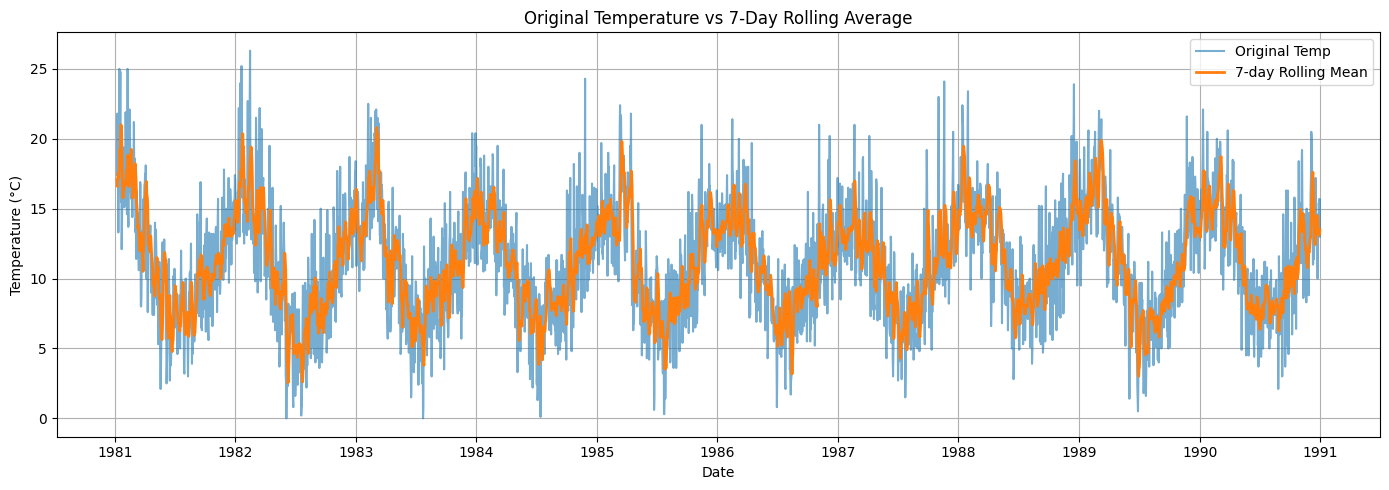

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and prepare the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

# Step 2: Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 3: Datetime-based features
# These help capture seasonal and calendar effects
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['week_of_year'] = df.index.isocalendar().week.astype(int)

# Step 4: Lag features (previous values of the target variable)
# Shifted values are used as input features for supervised learning
df['temp_lag_1'] = df['Temp'].shift(1)
df['temp_lag_2'] = df['Temp'].shift(2)

# Step 5: Rolling window statistics (mean, std over last 7 days)
# These are calculated on past values only (shifted to avoid leakage)
df['rolling_mean_7'] = df['Temp'].shift(1).rolling(window=7).mean()
df['rolling_std_7'] = df['Temp'].shift(1).rolling(window=7).std()

# Step 6: Expanding window statistics (e.g., cumulative mean up to day t)
df['expanding_mean'] = df['Temp'].shift(1).expanding().mean()
df['expanding_std'] = df['Temp'].shift(1).expanding().std()

# Step 7: Drop missing rows created by lag/rolling operations
# This is important for clean modeling
df_clean = df.dropna()

# Step 8: Show a sample of the feature-engineered data
print("Feature-engineered dataset (first 5 rows):\n")
print(df_clean.head())

# Optional: Visualize some of the engineered features
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Temp'], label='Original Temp', alpha=0.6)
plt.plot(df_clean['rolling_mean_7'], label='7-day Rolling Mean', linewidth=2)
plt.title("Original Temperature vs 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 1️ Datetime Features
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday  # 0 = Monday, 6 = Sunday

# 2️Lag Features
df['Lag_1'] = df['Temp'].shift(1)
df['Lag_7'] = df['Temp'].shift(7)

# 3️Rolling Window Statistics
df['Rolling_Mean_7'] = df['Temp'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Temp'].rolling(window=7).std()

# 4️Expanding Window Statistic
df['Expanding_Mean'] = df['Temp'].expanding(min_periods=7).mean()

# Display the enhanced dataset
print(df[['Temp', 'Lag_1', 'Lag_7', 'Rolling_Mean_7', 'Expanding_Mean']].head(10))


            Temp  Lag_1  Lag_7  Rolling_Mean_7  Expanding_Mean
Date                                                          
1981-01-01  20.7    NaN    NaN             NaN             NaN
1981-01-02  17.9   20.7    NaN             NaN             NaN
1981-01-03  18.8   17.9    NaN             NaN             NaN
1981-01-04  14.6   18.8    NaN             NaN             NaN
1981-01-05  15.8   14.6    NaN             NaN             NaN
1981-01-06  15.8   15.8    NaN             NaN             NaN
1981-01-07  15.8   15.8    NaN       17.057143       17.057143
1981-01-08  17.4   15.8   20.7       16.585714       17.100000
1981-01-09  21.8   17.4   17.9       17.142857       17.622222
1981-01-10  20.0   21.8   18.8       17.314286       17.860000


Always be careful with data leakage: make sure your features don’t use future values.

Lag and rolling features are extremely helpful for models like XGBoost, Random Forest, and Linear Regression.

ARIMA Forecasting (coming in next section)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

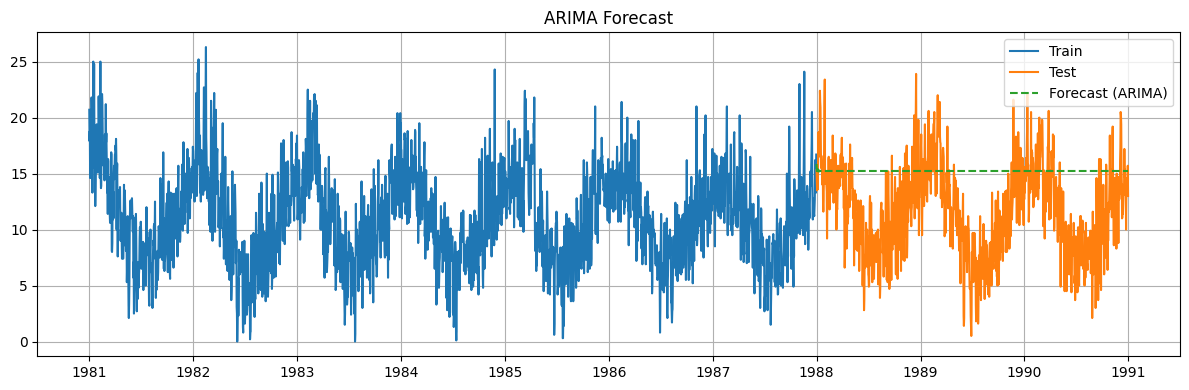

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and prepare data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use a subset for demonstration (e.g., first 7 years for training)
train = df[:'1987']
test = df['1988':]

# Fit an ARIMA model: order=(p,d,q)
# p = lag order (AR), d = degree of differencing, q = MA order
model = ARIMA(train['Temp'], order=(5, 1, 0))  # basic setup
model_fit = model.fit()

# Forecast next steps (equal to test length)
forecast = model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(12, 4))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, forecast, label='Forecast (ARIMA)', linestyle='--')
plt.title("ARIMA Forecast")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8votdebg/bvyubjk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8votdebg/2yv3h2vl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44575', 'data', 'file=/tmp/tmp8votdebg/bvyubjk7.json', 'init=/tmp/tmp8votdebg/2yv3h2vl.json', 'output', 'file=/tmp/tmp8votdebg/prophet_model33vl4nhn/prophet_model-20250406041521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


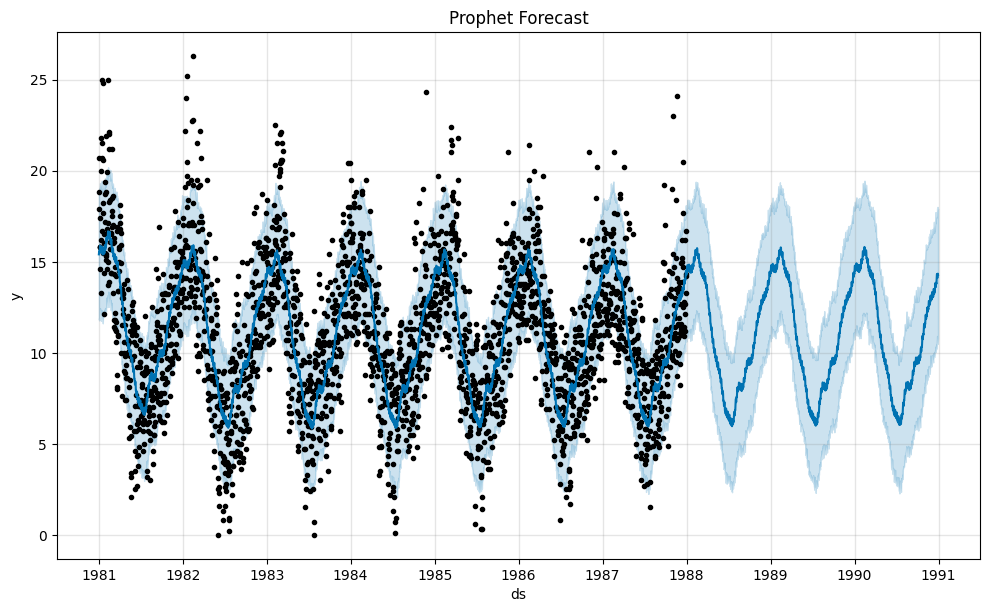

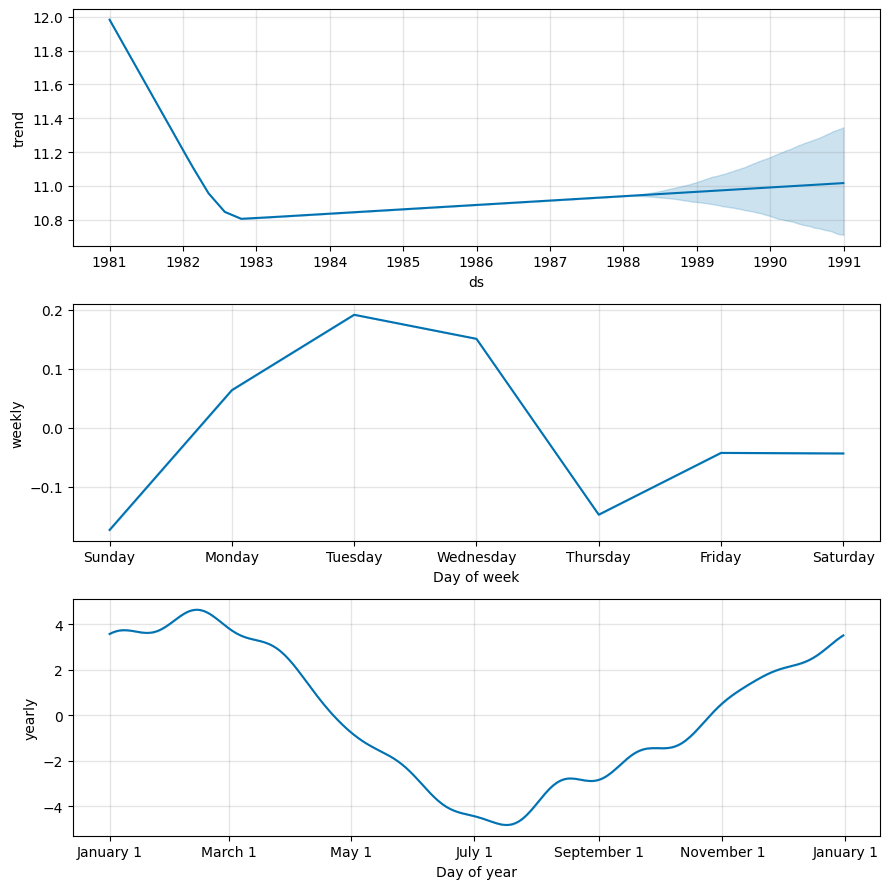

In [25]:
# Install Prophet if not available
# !pip install prophet

from prophet import Prophet

# Prophet requires specific column names: 'ds' for date, 'y' for value
df_prophet = df.reset_index().rename(columns={"Date": "ds", "Temp": "y"})

# Split into train/test
train_prophet = df_prophet[df_prophet['ds'] < '1988']
test_prophet = df_prophet[df_prophet['ds'] >= '1988']

# Initialize and fit the model
model = Prophet()
model.fit(train_prophet)

# Create future dataframe for the same horizon as test
future = model.make_future_dataframe(periods=len(test_prophet))
forecast = model.predict(future)

# Plot forecast with Prophet's built-in plot function
fig = model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

# Optional: View forecasted components (trend, weekly, yearly)
model.plot_components(forecast)
plt.tight_layout()
plt.show()
